In [2]:
import json
from utils.embedding_api import embedding_request_ada002
from articles_generation.generate_articles import *

In [3]:
def process_json(json_data):
    embeddings = []
    labels = []
    ev_scores = []
    discarded_embs = []
    disc_labels = []
    disc_scores = []
    for article in json_data:
        title = article.get("title", "")
        description = article.get("description", "")
        html = article.get("html", "")
        combined_text = title + " " + description + " " + html
        print(f"Generating embedding for article: {title[:10]}...")
        scoring_prompt = "You are a news expert, please respond with a score between 0 and 1 saying how much is the following article,"+\
            "related to the topic of Electric Vehicles: \n" + combined_text +\
            "\n Respond exclusively with a single floating point number. 0.5 means total uncertainty, greater than 0.5 means that is most probably related to EV. Less than 0.5 means that it's either about not electric vehicles or is about other unrelated topics."
        ev_score = completion_request(scoring_prompt) 
        ev_score = re.findall("\d+\.\d+", ev_score)[0]
             
        embedding = embedding_request_ada002(combined_text)
        if float(ev_score) <= 0.5:
            if embedding is not None:
                discarded_embs.append(embedding)
                disc_scores.append(ev_score)
                disc_labels.append(title)
        else:
            if embedding is not None:
                embeddings.append(embedding)
                labels.append(title)  # Use the title as a label
            
                ev_scores.append(ev_score)
        
    return np.array(embeddings), labels, ev_scores, np.array(discarded_embs), disc_labels, disc_scores

In [4]:
# Dimensionality reduction using t-SNE or UMAP
def perform_dimensionality_reduction(embeddings, method="umap", n_components=3):
    print(f"Performing dimensionality reduction using {method.upper()}...")
    if method == "tsne":
        reducer = TSNE(n_components=n_components, random_state=42, perplexity=10, n_iter=1000)
    elif method == "umap":
        reducer = umap.UMAP(n_components=n_components, random_state=42, n_neighbors=15, min_dist=0.1)
    else:
        raise ValueError("Unsupported dimensionality reduction method. Use 'tsne' or 'umap'.")
    reduced_embeddings = reducer.fit_transform(embeddings)
    return reduced_embeddings   

Generating embedding for article: First deal...
Generating embedding for article: Score a $1...
Generating embedding for article: All-time l...
Generating embedding for article: Electrifie...
Generating embedding for article: Black Frid...
Generating embedding for article: Massive 40...
Generating embedding for article: 9to5Toys B...
Generating embedding for article: Whoa! Appl...
Generating embedding for article: Buying Tip...
Generating embedding for article: Tesla dang...
Generating embedding for article: Tesla brea...
Generating embedding for article: Family stu...
Generating embedding for article: Hyundai re...
Generating embedding for article: VinFast of...
Generating embedding for article: 5 Best Hyb...
Generating embedding for article: VW's Entir...
Generating embedding for article: Elon Musk ...
Generating embedding for article: How electr...
Generating embedding for article: New Volksw...
Generating embedding for article: 2026 Kia E...
Generating embedding for article: Volksw

/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.0727
Silhouette score for 3 clusters: 0.0718


/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters: 0.0546
Silhouette score for 5 clusters: 0.0515


/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.0546
Silhouette score for 7 clusters: 0.0457


/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters: 0.0564
Silhouette score for 9 clusters: 0.0575


/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 10 clusters: 0.0573
Optimal number of clusters: 2
Performing KMeans clustering with 2 clusters...


/home/pietro/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/pietro/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


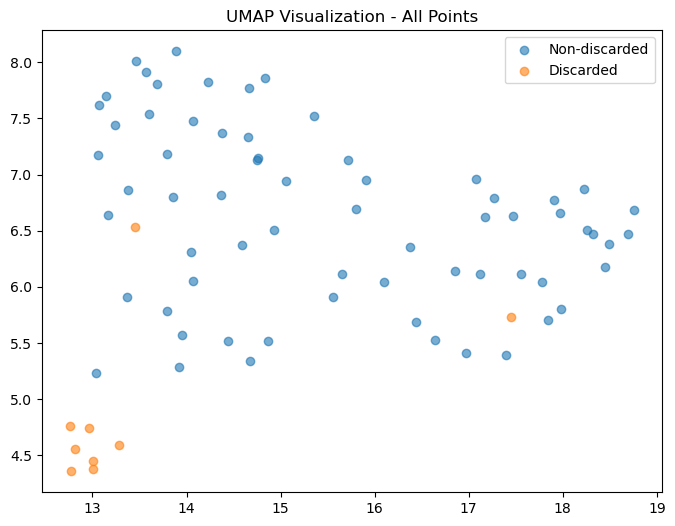

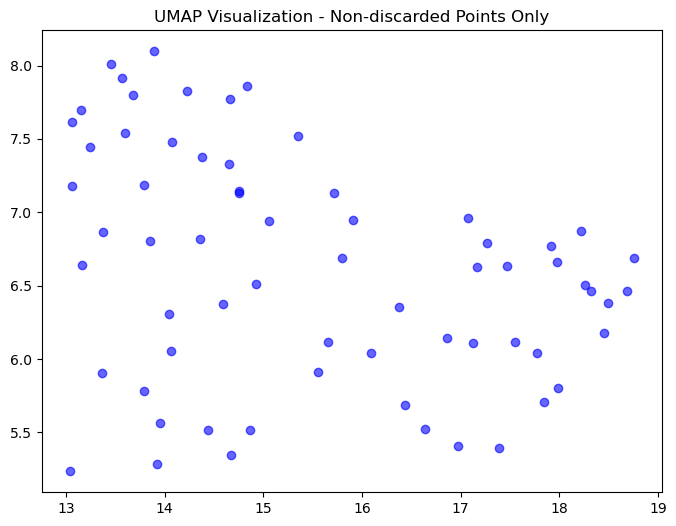

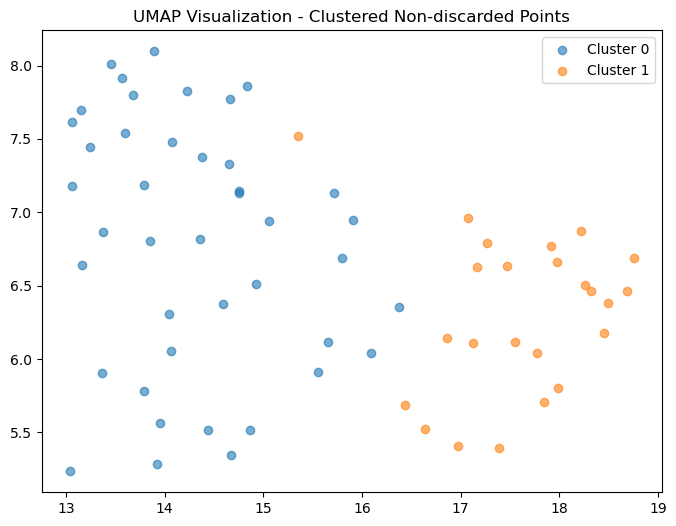

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import KMeans

# Assuming the following variables from your code
# embeddings: non-discarded embeddings
# discarded_embs: discarded embeddings
# cluster_labels: clustering results for non-discarded embeddings
# Example JSON input (replace this with reading from a file or API)
json_file = "../aggregator/output.json"  # Replace with your JSON file path
with open(json_file, "r", encoding="utf-8") as file:
    json_data = json.load(file)

embeddings, labels, ev_scores, disc_emb, disc_labels, disc_scores = process_json(json_data)

print("Number of selected articles:", len(embeddings))
#print("ev_scores:", '\n'.join(ev_scores))

# Automatically determine the number of clusters
max_clusters = min(10,len(embeddings)-1)  # Set a reasonable upper limit for clusters
optimal_clusters = choose_optimal_clusters(embeddings, max_clusters)

# Perform clustering on raw embeddings
cluster_labels = perform_clustering(embeddings, optimal_clusters)
# Combine discarded and non-discarded embeddings for UMAP
all_embeddings = np.vstack((embeddings, disc_emb))

# Perform UMAP for dimensionality reduction to 2D
#reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
#reduced_all_embeddings = reducer.fit_transform(all_embeddings)

reduced_all_embeddings = perform_dimensionality_reduction(all_embeddings, method="umap", n_components=3)

# Split reduced embeddings for visualization
reduced_non_discarded = reduced_all_embeddings[:len(embeddings)]
reduced_discarded = reduced_all_embeddings[len(embeddings):]

# Visualization 1: All points with the same color
plt.figure(figsize=(8, 6))
plt.scatter(reduced_non_discarded[:, 0], reduced_non_discarded[:, 1], label="Non-discarded", alpha=0.6)
plt.scatter(reduced_discarded[:, 0], reduced_discarded[:, 1], label="Discarded", alpha=0.6)
plt.title("UMAP Visualization - All Points")
plt.legend()
plt.show()

# Visualization 2: Non-discarded points only
plt.figure(figsize=(8, 6))
plt.scatter(reduced_non_discarded[:, 0], reduced_non_discarded[:, 1], color="blue", alpha=0.6)
plt.title("UMAP Visualization - Non-discarded Points Only")
plt.show()

# Visualization 3: Non-discarded points with clustering colors
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(cluster_labels)
for cluster in unique_clusters:
    cluster_points = reduced_non_discarded[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)
plt.title("UMAP Visualization - Clustered Non-discarded Points")
plt.legend()
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import KMeans

In [ ]:
# Example JSON input (replace this with reading from a file or API)
json_file = "../../aggregator/output.json"  # Replace with your JSON file path
with open(json_file, "r", encoding="utf-8") as file:
    json_data = json.load(file)

embeddings, labels, ev_scores, disc_emb, disc_labels, disc_scores = process_json(json_data)

print("Number of selected articles:", len(embeddings))
print("ev_scores:", '\n'.join(ev_scores))

# Automatically determine the number of clusters
max_clusters = min(10,len(embeddings)-1)  # Set a reasonable upper limit for clusters
optimal_clusters = choose_optimal_clusters(embeddings, max_clusters)

# Perform clustering on raw embeddings
cluster_labels = perform_clustering(embeddings, optimal_clusters)